# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s6e1/test.csv')

# Data Overview

In [5]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Compute values that are constant across columns
    total_rows = len(df)
    duplicates = df.duplicated().sum()

    # Use vectorized operations 
    dtypes = df.dtypes
    instances = df.count()
    unique = df.nunique()
    sum_null = df.isnull().sum()
    #null_percentage = (df.isnull().sum() / total_rows * 100).round(2)

    # Create the summary 
    df_check = pd.DataFrame({
        #'column': df.columns,
        'dtype': dtypes,
        'instances': instances,
        'unique': unique,
        'sum_null': sum_null,
        #'null_percentage': null_percentage,
        'duplicates': duplicates  
    })

    return df_check

print("Train Data")
display(check(train))
display(train.head())

print("Test Data")
display(check(test))
display(test.head())

Train Data


,dtype,instances,unique,sum_null,duplicates
id,int64,630000,630000,0,0
age,int64,630000,8,0,0
gender,object,630000,3,0,0
course,object,630000,7,0,0
study_hours,float64,630000,792,0,0
class_attendance,float64,630000,617,0,0
internet_access,object,630000,2,0,0
sleep_hours,float64,630000,66,0,0
sleep_quality,object,630000,3,0,0
study_method,object,630000,5,0,0


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


Test Data


,dtype,instances,unique,sum_null,duplicates
id,int64,270000,270000,0,0
age,int64,270000,8,0,0
gender,object,270000,3,0,0
course,object,270000,7,0,0
study_hours,float64,270000,786,0,0
class_attendance,float64,270000,604,0,0
internet_access,object,270000,2,0,0
sleep_hours,float64,270000,64,0,0
sleep_quality,object,270000,3,0,0
study_method,object,270000,5,0,0


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,630000,24,other,ba,6.85,65.2,yes,5.2,poor,group study,high,easy
1,630001,18,male,diploma,6.61,45.0,no,9.3,poor,coaching,low,easy
2,630002,24,female,b.tech,6.60,98.5,yes,6.2,good,group study,medium,moderate
3,630003,24,male,diploma,3.03,66.3,yes,5.7,average,mixed,medium,moderate
4,630004,20,female,b.tech,2.03,42.4,yes,9.2,average,coaching,low,moderate


# Explore Data and Insights

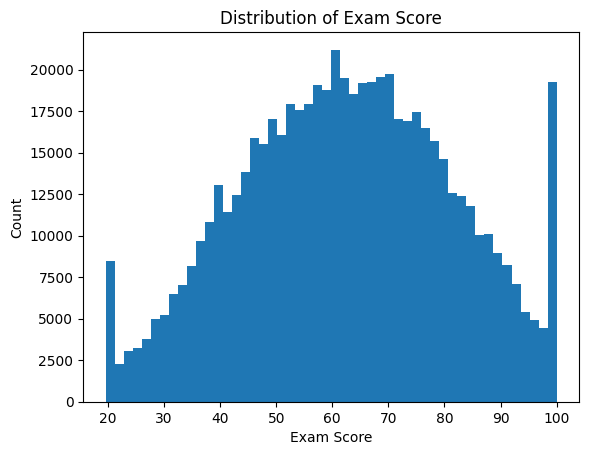

In [7]:
# distribution & tails
plt.figure()
plt.hist(train['exam_score'], bins=50)
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.title('Distribution of Exam Score')
plt.show()

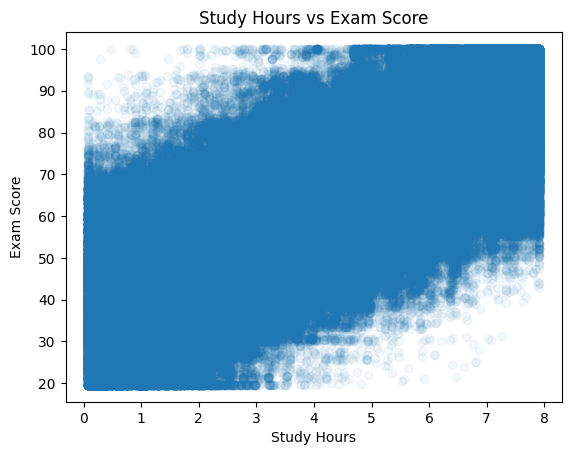

In [8]:
# Study hours vs score
plt.figure()
plt.scatter(train['study_hours'], train['exam_score'], alpha=0.05)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.show()

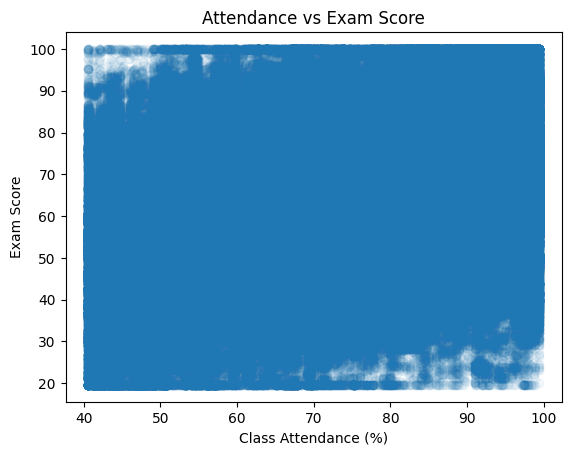

In [10]:
# Attendance matters more than effort?
plt.figure()
plt.scatter(train['class_attendance'], train['exam_score'], alpha=0.05)
plt.xlabel('Class Attendance (%)')
plt.ylabel('Exam Score')
plt.title('Attendance vs Exam Score')
plt.show()

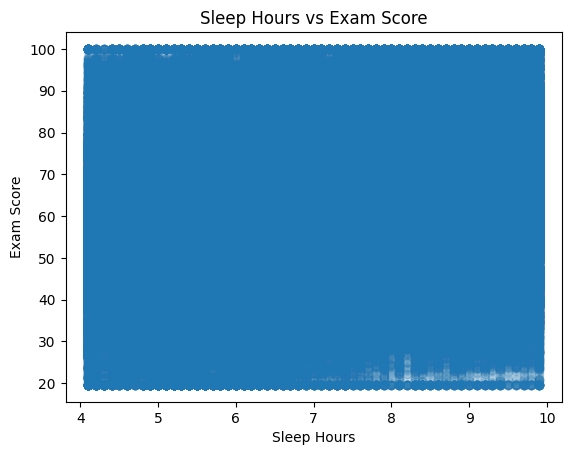

In [12]:
#
plt.figure()
plt.scatter(train['sleep_hours'], train['exam_score'], alpha=0.05)
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Sleep Hours vs Exam Score')
plt.show()